In [1]:
import cv2
from IPython.display import display, Image

画像の読み込み

In [2]:
img = cv2.imread('hello.jpg')
print(type(img))

<class 'numpy.ndarray'>


画像配列の状態を確認

In [3]:
print(img.shape)

(608, 800, 3)


個別の画素にアクセスする

In [5]:
upper_left = img[0:300, 0:300]
print(upper_left.shape)

(300, 300, 3)


画像の注目領域(ROI)の取得

In [4]:
print(img[100, 100])

[134 136 136]


ノートブック上に画像を表示

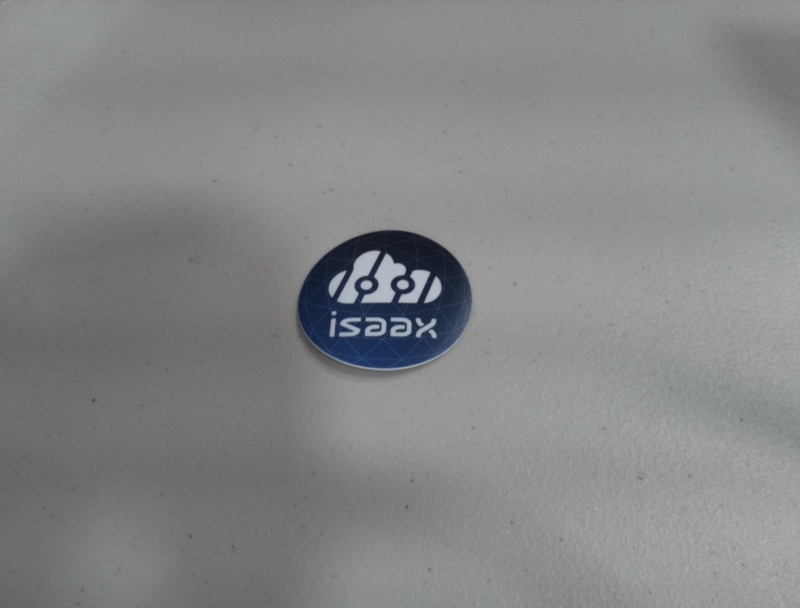

In [6]:
_, jpg = cv2.imencode('.jpg', img)
display(Image(jpg.tobytes()))

In [8]:
def display_image(img):
    _, jpg = cv2.imencode('.jpg', img)
    display(Image(jpg.tobytes()))

画像のリサイズ

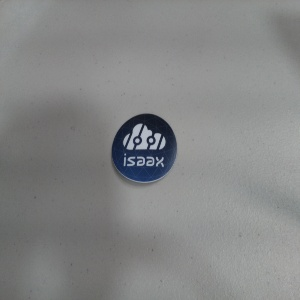

In [9]:
resized = cv2.resize(img, (300, 300))
display_image(resized)

比率を保ったまま横幅を300pxにリサイズ

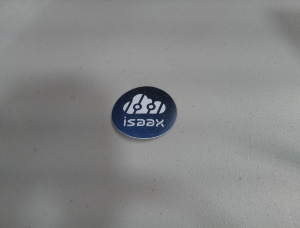

In [10]:
height, width = img.shape[:2] #最後の要素以外を取り出す
rate = 300 / float(width)
dst = (300, int(height * rate))
resized = cv2.resize(img, dst)
display_image(resized)

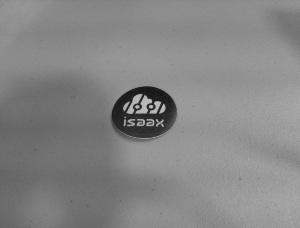

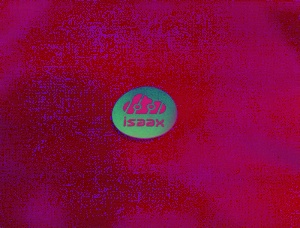

In [11]:
# グレースケールへの変換
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
display_image(gray)
# HSV色空間への変換
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
display_image(hsv)

In [12]:
print(gray.shape)

(228, 300)


In [13]:
background = cv2.imread('background.jpg')
foreground = cv2.imread('foreground.jpg')

差分画像の作成

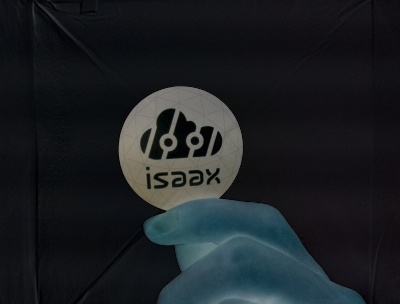

In [14]:
frameDelta = cv2.absdiff(background, foreground)
display_image(frameDelta)

しきい値処理

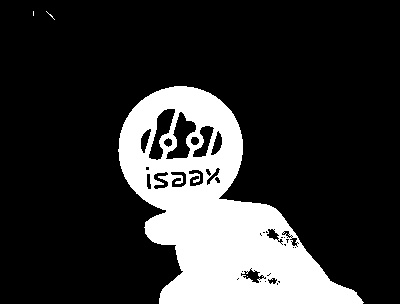

In [19]:
gray = cv2.cvtColor(frameDelta, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 50 ,255, cv2.THRESH_BINARY)[1]
display_image(thresh)

輪郭情報の取得

In [20]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

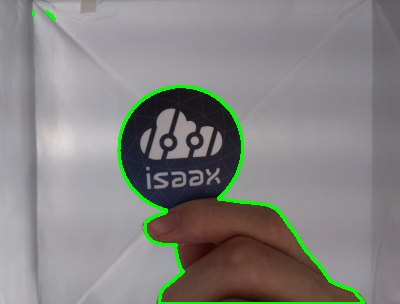

In [21]:
drawn_cnts = foreground.copy()
cv2.drawContours(drawn_cnts, cnts, -1, (0, 255, 0), 2)
display_image(drawn_cnts)

取得した輪郭を囲う矩形を描画

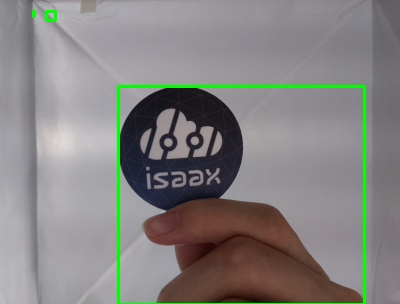

In [22]:
drawn_rect = foreground.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(drawn_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

display_image(drawn_rect)

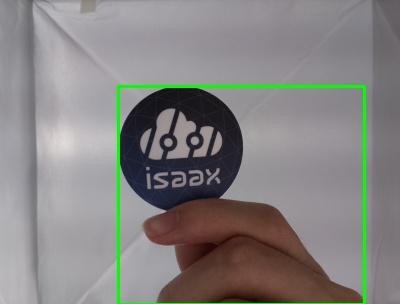

In [23]:
drawn_rect = foreground.copy()
for c in cnts:
    if cv2.contourArea(c) < 1000:
        continue
        
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(drawn_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

display_image(drawn_rect)

モルフォロジー変換 - オープニング処理

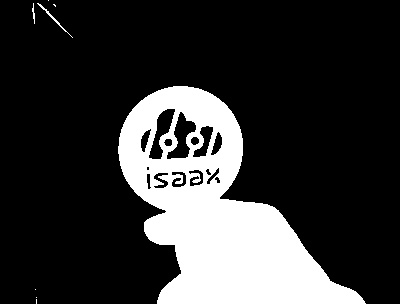

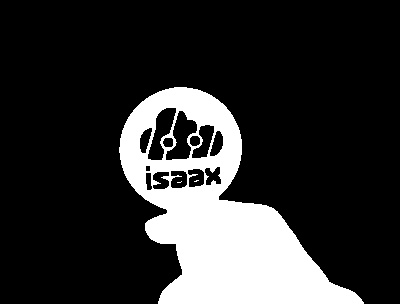

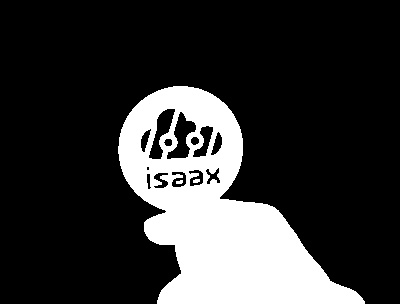

In [24]:
# 画像のしきい値処理。わかりやすくするためしきい値35で処理
sample = cv2.threshold(gray, 35, 255, cv2.THRESH_BINARY)[1] 
# 画像を占める白い領域を縮小。小さい領域を消す
erosion = cv2.erode(sample, None, iterations = 1)
# 画像を占める白い領域を膨張。元の大きさに戻す
dilation = cv2.dilate(erosion, None, iterations=1)

display_image(sample)
display_image(erosion)
display_image(dilation)

モルフォロジー変換　- クロージング処理

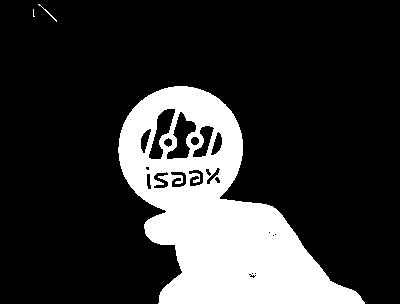

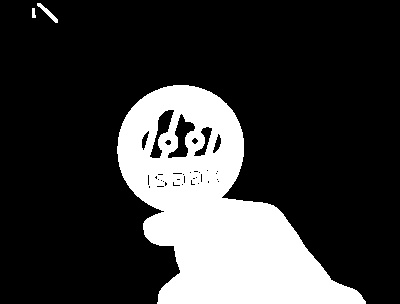

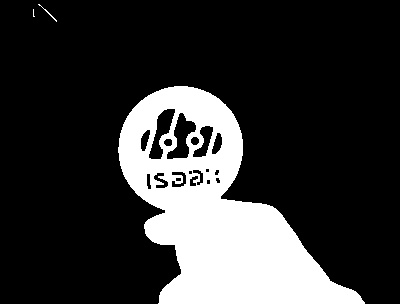

In [25]:
# 画像のしきい値処理。説明のためにしきい値45で処理
sample = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1] 
# 画像を占める白い領域を膨張
dilation = cv2.dilate(sample, None, iterations=1)
# 画像を占める白い領域を縮小
erosion = cv2.erode(dilation, None, iterations=1)

display_image(sample)
display_image(dilation)
display_image(erosion)